### Indice
* [ Standard Librarys](#1)
    <br>

* [Dataset](#2)
    * [Hot encoding](#2.1)
    * [split data](#2.2)
    <br>
    <br>
    
* [Read_hyperparamas Random Forest](#3)

    <br>

* [Feature Importance](#4)
    <br>
    
    * [Feature importance with random Forest](#4.1)
    * [Feature importance mlxtend](#4.2)
    * [Feature importance sklearn](#4.3)

### Standard Librarys <a class="anchor" id="1"></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import *

### Dataset <a class="anchor" id="2"></a>

In [14]:
df = pd.read_csv('../../data/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Hot encoding <a class="anchor" id="2.1"></a>

In [15]:
#===============One Hot Encoding=======================#
df=pd.get_dummies(data=df, drop_first=True)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


### split data <a class="anchor" id="2.2"></a>

In [16]:
X,y =df.drop('y_yes',axis=1).values, df['y_yes'].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)

### Read_hyperparamas Random Forest <a class="anchor" id="3"></a>

In [20]:
#read_hyperameters
RandomForest_hyperparameter = read_hyperameter_json('../../best_params_models/random_forest_params.json')

Hyperameter:   {'n_estimators': 2300, 'max_depth': 11, 'max_features': 0.897477660447081}


## Feature Importance <a class="anchor" id="4"></a>

### Feature importance with random Forest <a class="anchor" id="4.1"></a>

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(**RandomForest_hyperparameter)
model_rf.fit(X_train,y_train)

print('train Accuracy',np.mean(model_rf.predict(X_train) == y_train)*100)
print('test Accuracy',np.mean(model_rf.predict(X_test) == y_test)*100)

train Accuracy 96.50029482154625
test Accuracy 91.59181030994577
Wall time: 3min 15s


In [26]:
range(X_train.shape[1]), importance_vals[indices]

(range(0, 53),
 array([3.86268066e-01, 2.03138122e-01, 8.73310600e-02, 6.07396043e-02,
        2.89897391e-02, 2.80513993e-02, 2.19623631e-02, 1.23583606e-02,
        9.19670749e-03, 8.75032740e-03, 8.03822175e-03, 7.26688518e-03,
        6.91163924e-03, 6.66244690e-03, 6.61808191e-03, 6.20876956e-03,
        6.11516265e-03, 6.10004765e-03, 5.81148088e-03, 5.78186197e-03,
        5.71437643e-03, 5.05984841e-03, 4.80918092e-03, 4.48546833e-03,
        4.36160114e-03, 4.11930976e-03, 4.03024813e-03, 3.92067521e-03,
        3.78065326e-03, 3.67693857e-03, 3.66016213e-03, 3.65247630e-03,
        3.63119570e-03, 3.59957147e-03, 3.27259067e-03, 3.10953676e-03,
        2.64586646e-03, 2.61279920e-03, 2.52017239e-03, 2.49710930e-03,
        1.91378422e-03, 1.82511005e-03, 1.62369230e-03, 1.56842451e-03,
        1.22016217e-03, 1.12948230e-03, 8.77586573e-04, 8.44130726e-04,
        7.19625618e-04, 5.39002149e-04, 2.01648915e-04, 7.72222662e-05,
        0.00000000e+00]))

In [31]:
X.shape

(41188, 53)

In [35]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


In [33]:
range(X_train.shape[1]), df.columns[1:][indices]

(range(0, 53),
 Index(['campaign', 'job_blue-collar', 'nr.employed', 'duration', 'previous',
        'euribor3m', 'pdays', 'cons.conf.idx', 'y_yes', 'day_of_week_thu',
        'emp.var.rate', 'education_unknown', 'loan_unknown',
        'contact_telephone', 'month_aug', 'month_sep', 'education_illiterate',
        'poutcome_nonexistent', 'day_of_week_wed', 'day_of_week_tue',
        'job_unemployed', 'marital_single', 'education_university.degree',
        'marital_unknown', 'job_entrepreneur', 'default_yes',
        'education_high.school', 'job_retired', 'job_self-employed',
        'cons.price.idx', 'job_student', 'education_basic.9y',
        'poutcome_success', 'month_may', 'job_unknown', 'default_unknown',
        'job_housemaid', 'job_technician', 'job_services', 'job_management',
        'month_jun', 'marital_married', 'month_oct', 'month_dec', 'month_mar',
        'month_nov', 'loan_yes', 'housing_yes', 'day_of_week_mon', 'month_jul',
        'education_basic.6y', 'education_p

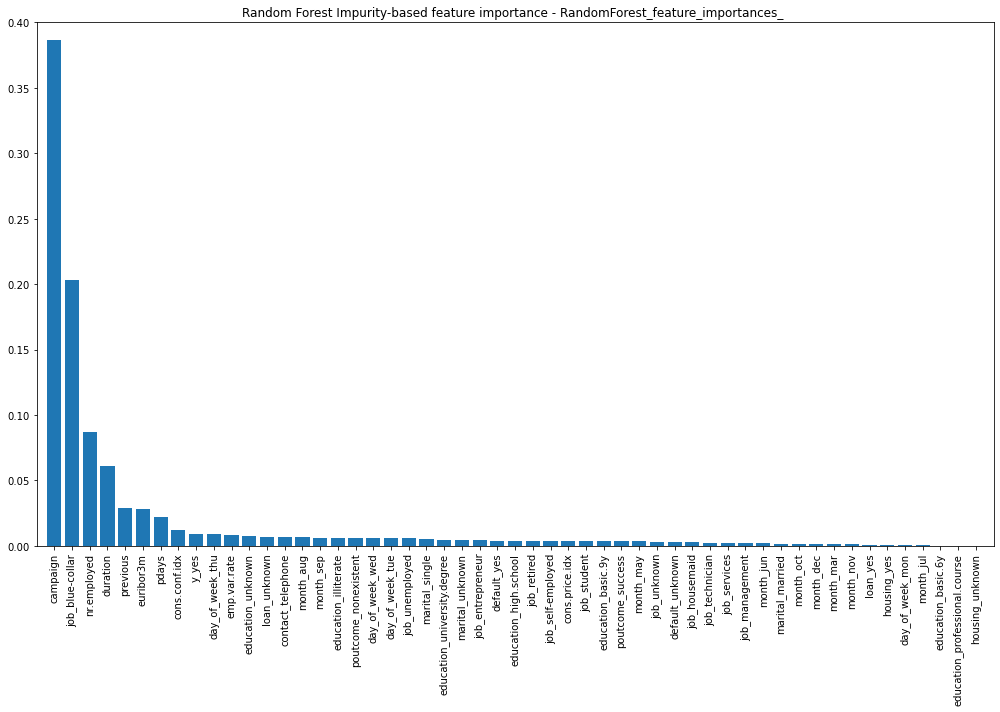

In [23]:
importance_vals = model_rf.feature_importances_
indices = np.argsort(importance_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest Impurity-based feature importance - RandomForest_feature_importances_ ')
plt.bar(range(X_train.shape[1]), importance_vals[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.4])
plt.tight_layout()
plt.savefig('importance_feature.pdf')
plt.show()

### Feature importance mlxtend <a class="anchor" id="4.2"></a>

In [ ]:
%%time
from mlxtend.evaluate import feature_importance_permutation

imp_vals, imp_all = feature_importance_permutation(
    predict_method=model_rf.predict,
    X = X_test,
    y = y_test,
    metric='accuracy',
    num_rounds=50,
    seed = 0)

In [ ]:
std = np.std(imp_all, axis =1)
indices = np.argsort(imp_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest feature importance via permutation importance - mlxtend')
plt.bar(range(X_train.shape[1]), imp_vals[indices],yerr = std[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.06])
plt.tight_layout()
plt.savefig('importance_feature/importance_feature_2.pdf')
plt.show()

### Feature importance sklearn <a class="anchor" id="4.3"></a>

In [ ]:
%%time
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=model_rf,
    X = X_test,
    y = y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=12
)

In [ ]:
std = np.std(result.importances, axis =1)
indices = np.argsort(imp_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest - permutation importance - sklearn')
plt.bar(range(X_train.shape[1]), imp_vals[indices],yerr = std[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.06])
plt.tight_layout()
plt.savefig('importance_feature/importance_feature_3.pdf')
plt.show()